# Vizualizace fraktálů #

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

@njit
def julia(z, c, max_iter):
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter


vytvoreni statickych mnozin

/tmp/ipykernel_310848/3044741033.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  return (r1, r2, np.fromiter((func(complex(r, i), max_iter) if c is None else func(complex(r, i), c, max_iter) for i in r2 for r in r1), dtype=np.uint8).reshape((height, width)))


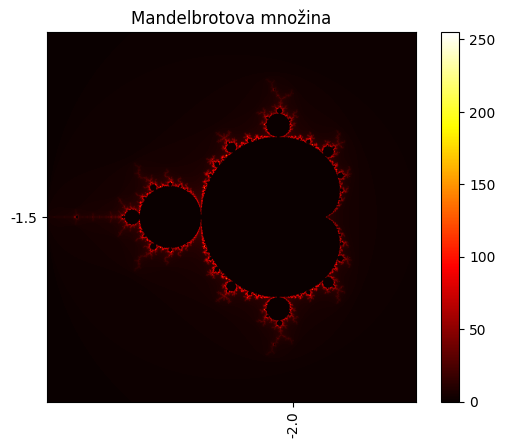

/tmp/ipykernel_310848/3044741033.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  return (r1, r2, np.fromiter((func(complex(r, i), max_iter) if c is None else func(complex(r, i), c, max_iter) for i in r2 for r in r1), dtype=np.uint8).reshape((height, width)))


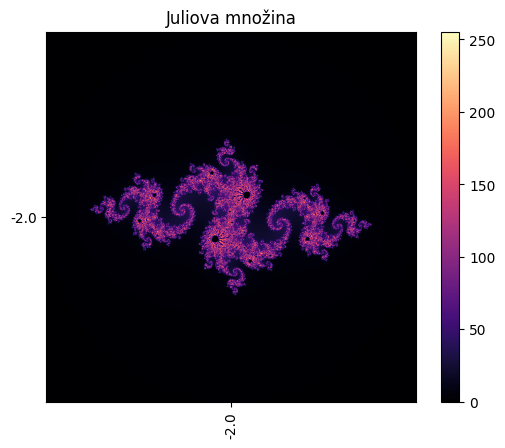

In [23]:
def draw_fractal(func, xlim, ylim, width, height, max_iter, c=None):
    r1 = np.linspace(xlim[0], xlim[1], width)
    r2 = np.linspace(ylim[0], ylim[1], height)
    return (r1, r2, np.fromiter((func(complex(r, i), max_iter) if c is None else func(complex(r, i), c, max_iter) for i in r2 for r in r1), dtype=np.uint8).reshape((height, width)))

def plot_mandelbrot(x, y, z):
    fig, ax = plt.subplots()
    ticks = np.arange(0,len(x),3)
    plt.xticks(ticks, x[ticks], rotation=90)
    plt.yticks(ticks, y[ticks])
    ax.set_title('Mandelbrotova množina')
    img = ax.imshow(z, origin='lower', cmap='hot', extent=(x.min(), x.max(), y.min(), y.max()))
    plt.colorbar(img)
    plt.show()

def plot_julia(x, y, z):
    fig, ax = plt.subplots()
    ticks = np.arange(0,len(x),3)
    plt.xticks(ticks, x[ticks], rotation=90)
    plt.yticks(ticks, y[ticks])
    ax.set_title('Juliova množina')
    img = ax.imshow(z, origin='lower', cmap='magma', extent=(x.min(), x.max(), y.min(), y.max()))
    plt.colorbar(img)
    plt.show()

x, y, z = draw_fractal(mandelbrot, (-2.0, 1.0), (-1.5, 1.5), 1000, 1000, 256)
plot_mandelbrot(x, y, z)

x, y, z = draw_fractal(julia, (-2.0, 2.0), (-2.0, 2.0), 1000, 1000, 256, complex(-0.8, 0.156))
plot_julia(x, y, z)